## Prosper Lending: Who Are The Most Profitable Borrowers?

### Table of Contents

#### 1. Introduction

#### 2. Data Gathering

#### 3. Data Assessing

#### 4. Data Cleaning

#### 5. Feature Engineering

#### 6. Exploratory Data Analysis
   - Univariate Visualizations
   - Bivariate Visualizations
   - Multivariate Visualizations

#### 7. Conclusions

#### 8. Limitations

### 1. Introduction

This notebook is aimed at analysing the main value drivers of the P2P Lending marketplace Prosper, to ascertain which loans drive the revenues and perform a profiling of the most profitable borrowers. 

The main value drivers are:

- **Number of Originations**: indicates the ability to attract borrowers.
- **Servicing Fees** and **Origination Fees**: they comprise the core revenue stream for Porsper. For the aim of this analysis only Origination Fees are going to be considered as woth the data available is not possible to carry out a thorough analysis of Servicing Fees.
- **Lender Returns**: they are pivotal to attract lender on the platform. Loan must offer a decent return (given a certain risk level) to attract lenders (Servicing Fees)

The **Origination Fees** are the focus of our analysis. They are calucated as a percentage (depending on the risk profile) of the amount requested by the borrower. Therefore the main variables involved are:

- The Prosper Rating of the borrower.
- The amount requested by the borrower.

The first part of the analysis is aimed at selecting which are the most profitable loans. Both the amount of the Origination Fees and the the estimated returns are going to be considerated. The **estimated returns** are important because high returns (at a bearable risk) attract more investors and therefore more Servicing Fees. Thee most profitable loans will be clustered based on the Prosper Rating and the Term of the loan.

As the Origination Fees depend on the risk profile of the borrower, after having picked the most profitable loans, in the second part of the analysis a profiling (based on socio-economic features and credit history) of the most profitable borrowers will be provided.

### 2. Data Gathering

In [377]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import squarify

In [378]:
#Load data
loans=pd.read_csv('prosperLoanData.csv', usecols=['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalInquiries', 'CurrentDelinquencies', 'OpenRevolvingAccounts', 'BankcardUtilization', 'StatedMonthlyIncome', 'TotalProsperLoans', 'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'Investors', 'DebtToIncomeRatio'])
loans.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,TotalInquiries,CurrentDelinquencies,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,ProsperPrincipalBorrowed,LoanOriginalAmount,LoanOriginationQuarter,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,NaN,0,...,3.0,2.0,0.00,0.17,3083.333333,NaN,NaN,9425,Q3 2007,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.05470,A,7.0,2,...,5.0,0.0,0.21,0.18,6125.000000,NaN,NaN,10000,Q1 2014,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,NaN,0,...,1.0,1.0,NaN,0.06,2083.333333,NaN,NaN,3001,Q1 2007,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.06000,A,9.0,16,...,1.0,4.0,0.04,0.15,2875.000000,NaN,NaN,10000,Q4 2012,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.09066,D,4.0,2,...,9.0,0.0,0.81,0.26,9583.333333,1.0,11000.0,15000,Q3 2013,20


### 3. Data Assessing

Visual assessment has been done using MS Excel.

In [379]:
#Chech data types
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 28 columns):
ListingKey                   113937 non-null object
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
CurrentCreditLines           106333 non-null float64
OpenCreditLines              106333 non-null float64
Open

In [380]:
#Check missing values
loans.isna().any()

ListingKey                   False
ListingCreationDate          False
Term                         False
LoanStatus                   False
BorrowerAPR                   True
BorrowerRate                 False
EstimatedReturn               True
ProsperRating (Alpha)         True
ProsperScore                  True
ListingCategory (numeric)    False
BorrowerState                 True
EmploymentStatus              True
IsBorrowerHomeowner          False
CreditScoreRangeLower         True
CreditScoreRangeUpper         True
CurrentCreditLines            True
OpenCreditLines               True
OpenRevolvingAccounts        False
TotalInquiries                True
CurrentDelinquencies          True
BankcardUtilization           True
DebtToIncomeRatio             True
StatedMonthlyIncome          False
TotalProsperLoans             True
ProsperPrincipalBorrowed      True
LoanOriginalAmount           False
LoanOriginationQuarter       False
Investors                    False
dtype: bool

In [381]:
#Check duplicates
loans.duplicated().any()

False

#### Cleaning Issues:

1. 'ListingCreationDate' is a string: it needs to be converted to DateTime


2. Missing Values in:
    - 'EstimatedReturn': Applicable for loans originated after July 2009. Only loans after 2009 will be taken into consideration.
    - 'ProsperRating (Alpha)': Applicable for loans originated after July 2009. Only loans after 2009 will be taken into consideration.
    - 'ProsperScore': Applicable for loans originated after July 2009. Only loans after 2009 will be taken into consideration.
    - 'BorrowerState': Further assessment needed.
    - 'EmploymentStatus': Further assessment needed.
    - 'EmploymentStatusDuration': Further assessment needed.
    - 'CreditScoreRangeLower': Further assessment needed.
    - 'CreditScoreRangeUpper': Further assessment needed.
    - 'CurrentCreditLines': Further assessment needed.
    - 'DebtToIncomeRatio': Further assessment needed.
    - 'OpenCreditLines': Further assessment needed.
    - 'TotalInquiries': Further assessment needed.
    - 'CurrentDelinquencies': Further assessment needed.
    - 'BankcardUtilization': Further assessment needed.
    - 'DebtToIncomeRatio': It will be dropped as it will lead to a not accurate analysis.
    - 'TotalProsperLoans': Further assessment needed.
    - 'ProsperPrincipalBorrowed': Further assessment needed.


3. Drop duplicated observations

### 4. Data Cleaning

In [382]:
#Create Copy of DataFrame
loans_clean = loans.copy()

#### 4.1 Convert 'ListingCreationDate' to DateTime and extract only loans originated after 2009

In [383]:
#Extract only date
loans_clean['ListingCreationDate']=pd.to_datetime(loans_clean['ListingCreationDate'])
#Check results
loans_clean['ListingCreationDate'].head()

0   2007-08-26 19:09:29.263
1   2014-02-27 08:28:07.900
2   2007-01-05 15:00:47.090
3   2012-10-22 11:02:35.010
4   2013-09-14 18:38:39.097
Name: ListingCreationDate, dtype: datetime64[ns]

Many variables, such as Prosper Score, are not available for loans originated before 2009. So only loans originated after 2009 are going to be selected.

In [384]:
#Extract loans
loans_clean=loans_clean[loans_clean['ListingCreationDate'].dt.date> datetime.date(2009,8,1)]
#Check results 
(2006,2007,2008,2009) in loans_clean['ListingCreationDate'].dt.year

False

#### 4.2 Handling missing values

In [385]:
loans_clean.isna().any()

ListingKey                   False
ListingCreationDate          False
Term                         False
LoanStatus                   False
BorrowerAPR                  False
BorrowerRate                 False
EstimatedReturn              False
ProsperRating (Alpha)        False
ProsperScore                 False
ListingCategory (numeric)    False
BorrowerState                False
EmploymentStatus             False
IsBorrowerHomeowner          False
CreditScoreRangeLower        False
CreditScoreRangeUpper        False
CurrentCreditLines           False
OpenCreditLines              False
OpenRevolvingAccounts        False
TotalInquiries               False
CurrentDelinquencies         False
BankcardUtilization          False
DebtToIncomeRatio             True
StatedMonthlyIncome          False
TotalProsperLoans             True
ProsperPrincipalBorrowed      True
LoanOriginalAmount           False
LoanOriginationQuarter       False
Investors                    False
dtype: bool

Having dropped the loans created after 2009, the amount of missing data has been reduced, but here are still missing values in:

- 'TotalProsperLoans'
- 'ProsperPrincipalBorrowed'
- 'DebtToIncomeRatio' 

All of the above columns contain numeric values. The missing values are stored as NaN (Not a Number). 

For the columns 'TotalProsperLoans' adn ProsperPrincipalBorrowed' the values are missing only if the borrower does not have any previous loan with Prosper. As Pandas does not take into account NaN to perform calculations and we will use those numbers only for loans in which the borrower already have a loan with Prosper, the missing values are kept as NaN.

Regarding 'DebtToIncomeRatio', it will be dropped as it will lead to a not accurate analysis.

#### Drop 'DebtToIncomeRatio'

In [386]:
loans_clean.drop('DebtToIncomeRatio', axis=1, inplace=True)
#Check results
'DebtToIncomeRatio' in loans_clean.columns

False

#### 4.3 Handling duplicated observation

In [387]:
#Further assessment
loans_clean.duplicated().any()

False

After dropping loans originated before 2009 there are no duplicated observations.

### 5. Feature Engineering

In order to carry out the analysis  additional variables have to be created:

1. OriginationRate = BorrowerAPR - BorrowerRate. This is the rate applied to the loan amount to compute the Origination Fee.


2. OriginationFee = (BorrowerAPR - BorrowerRate) * LoanOriginalAmount. The Origination Fee paid by the borrower before receiving the loan.


3. Create ListingCategory column with alphanumeric values instead of numeric.


4. AlreadyProsperBorrower = indicates if borrower already had a loan with Prosper or not. 

#### 5.1 Create OriginationRate

In [388]:
#Create OriginationRate
loans_clean['OriginationRate'] = loans_clean['BorrowerAPR'] - loans_clean['BorrowerRate']
#Check results
loans_clean['OriginationRate'].head()

1    0.02816
3    0.02788
4    0.03764
5    0.02285
6    0.03912
Name: OriginationRate, dtype: float64

#### 5.2 Create OriginationFee

In [389]:
#Create OriginationFee
loans_clean['OriginationFee'] = loans_clean['LoanOriginalAmount']*loans_clean['OriginationRate']
#Check results
loans_clean['OriginationFee'].head()

1    281.60
3    278.80
4    564.60
5    342.75
6    117.36
Name: OriginationFee, dtype: float64

#### 5.3 Create ListingCategory

In [390]:
def listing_category_alpha(ListingCategoryNumeric):
    if ListingCategoryNumeric==0:
        category = 'Not Available'
    if ListingCategoryNumeric==1:
        category = 'Debt Consolidation'
    if ListingCategoryNumeric==2:
        category = 'Home Improvement'
    if ListingCategoryNumeric==3:
        category = 'Business'
    if ListingCategoryNumeric==4:
        category = 'Personal Loan'
    if ListingCategoryNumeric==5:
        category = 'Student Use'
    if ListingCategoryNumeric==6:
        category = 'Auto'
    if ListingCategoryNumeric==7:
        category = 'Other'
    if ListingCategoryNumeric==8:
        category = 'Baby&Adoption'
    if ListingCategoryNumeric==9:
        category = 'Boat'
    if ListingCategoryNumeric==10:
        category = 'Cosmetic Procedure'
    if ListingCategoryNumeric==11:
        category = 'Engagement Ring'
    if ListingCategoryNumeric==12:
        category = 'Green Loans'
    if ListingCategoryNumeric==13:
        category = 'Household Expanses'
    if ListingCategoryNumeric==14:
        category = 'Large Purchases'
    if ListingCategoryNumeric==15:
        category = 'Medical/Dental'
    if ListingCategoryNumeric==16:
        category = 'Motorcycle'
    if ListingCategoryNumeric==17:
        category = 'RV'
    if ListingCategoryNumeric==18:
        category = 'Taxes'
    if ListingCategoryNumeric==19:
        category = 'Vacation'
    if ListingCategoryNumeric==20:
        category = 'Wedding Loans'
    return category

In [391]:
loans_clean['ListingCategory']=loans_clean['ListingCategory (numeric)'].apply(listing_category_alpha)
#Check results
loans_clean['ListingCategory'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expanses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

#### 5.4 Create PastProsperBorrower

In [392]:
loans_clean.loc[loans_clean.TotalProsperLoans.isna(), 'PastProsperBorrower']= 'No'
loans_clean['PastProsperBorrower'].fillna('Yes', inplace=True)
#Check results
loans_clean['PastProsperBorrower'].unique()

array(['No', 'Yes'], dtype=object)

In [393]:
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84669 entries, 1 to 113936
Data columns (total 31 columns):
ListingKey                   84669 non-null object
ListingCreationDate          84669 non-null datetime64[ns]
Term                         84669 non-null int64
LoanStatus                   84669 non-null object
BorrowerAPR                  84669 non-null float64
BorrowerRate                 84669 non-null float64
EstimatedReturn              84669 non-null float64
ProsperRating (Alpha)        84669 non-null object
ProsperScore                 84669 non-null float64
ListingCategory (numeric)    84669 non-null int64
BorrowerState                84669 non-null object
EmploymentStatus             84669 non-null object
IsBorrowerHomeowner          84669 non-null bool
CreditScoreRangeLower        84669 non-null float64
CreditScoreRangeUpper        84669 non-null float64
CurrentCreditLines           84669 non-null float64
OpenCreditLines              84669 non-null float64
OpenRevolvi

#### Save clean DataFrame as 'loans_data'

In [394]:
loans_clean.to_csv('loans_data')

## 6. Exploratory Data Analysis

In [395]:
loans_data=pd.read_csv('loans_data')

In [396]:
#Set plotting style
plt.style.use('ggplot')

### 6.1 Univariate Visualizations - Numeric Variables

#### Distribution of Origination Rates

(count    84669.000000
 mean         0.030649
 std          0.010369
 min          0.002150
 25%          0.023970
 50%          0.028380
 75%          0.037310
 max          0.100800
 Name: OriginationRate, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Origination Rates'))

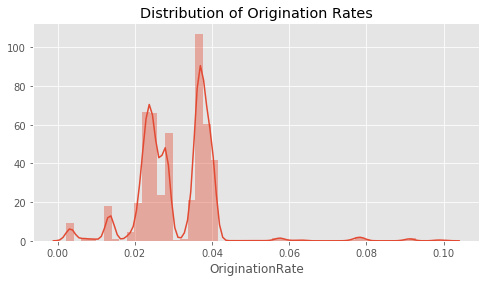

In [397]:
plt.figure(figsize=[8,4])
loans_data['OriginationRate'].describe(), sns.distplot(loans_data['OriginationRate']).set_title('Distribution of Origination Rates')

The median origination rate is 2.8%. It is distributed in clusters as the rate is computed based on the risk profile. So each risk profile is associated with a origination rate.

#### Distribution of Origination Fees

(count    84669.000000
 mean       258.424653
 std        176.989038
 min          3.350000
 25%        133.560000
 50%        211.970000
 75%        359.700000
 max       1943.000000
 Name: OriginationFee, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Origination Fees ($)'))

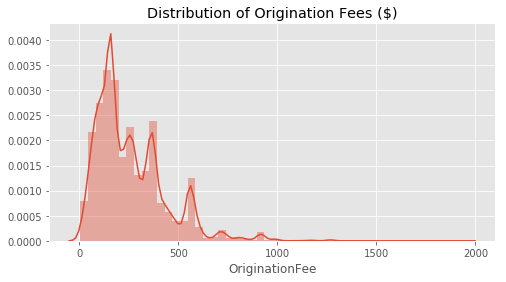

In [398]:
plt.figure(figsize=[8,4])
loans_data['OriginationFee'].describe(), sns.distplot(loans_data['OriginationFee']).set_title('Distribution of Origination Fees ($)')

The median Origination Fee is 211.97 USD and the distribution is skewed to the left. It follows the distribution of the loans amounts as the Origination Fee is computed on the amount of the loan.

#### Distribution of Estimated Returns

(count    84669.000000
 mean         0.096093
 std          0.030363
 min         -0.182700
 25%          0.074550
 50%          0.092110
 75%          0.116600
 max          0.283700
 Name: EstimatedReturn, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Estimated Returns (% rate)'))

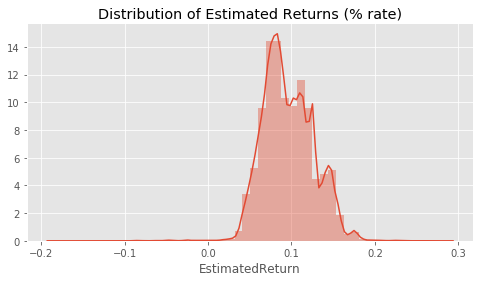

In [399]:
plt.figure(figsize=[8,4])
loans_data['EstimatedReturn'].describe(), sns.distplot(loans_data['EstimatedReturn']).set_title('Distribution of Estimated Returns (% rate)')

The median estimated return is 9.21%. The minimun is negative as for many loans has been estimated a loss.

#### Distribution of Loan Original Amounts

(count    84669.000000
 mean      9094.257981
 std       6288.595873
 min       1000.000000
 25%       4000.000000
 50%       7500.000000
 75%      13750.000000
 max      35000.000000
 Name: LoanOriginalAmount, dtype: float64,
 Text(0.5, 1.0, 'Distribution of Loan Original Amounts ($)'))

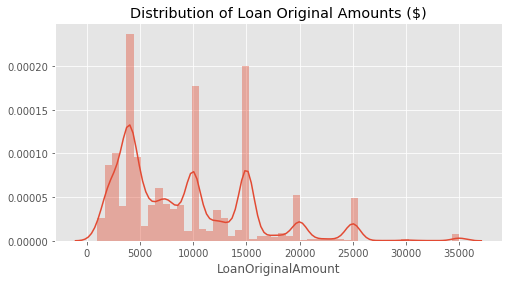

In [400]:
plt.figure(figsize=[8,4])
loans_data['LoanOriginalAmount'].describe(), sns.distplot(loans_data['LoanOriginalAmount']).set_title('Distribution of Loan Original Amounts ($)')

The median loan amount is 7500 USD and the distribution is skewed to the left.

### 6.2 Univariate Visualization - Categorical Variables

In this section the number of originations will be analysed across different dimensions.

#### Originations by Loan Term

(36    69.105576
 60    28.989359
 12     1.905066
 Name: Term, dtype: float64, Text(0, 0.5, '% of originations'))

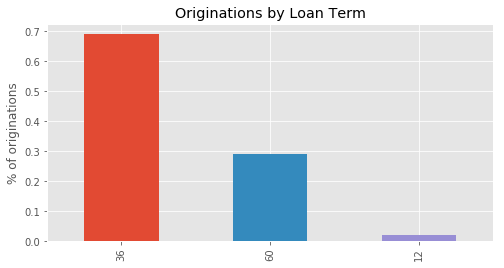

In [140]:
loans_data['Term'].value_counts(normalize=True)*100, loans_data['Term'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by Loan Term').set_ylabel('% of originations')

The 69.1% of the loans ha a 36 months term, which is by far the most frequent.

#### Originations by Prosper Rating

(C     21.617121
 B     18.384533
 A     17.137323
 D     16.827883
 E     11.552044
 HR     8.176546
 AA     6.304551
 Name: ProsperRating (Alpha), dtype: float64,
 Text(0, 0.5, '% of originations'))

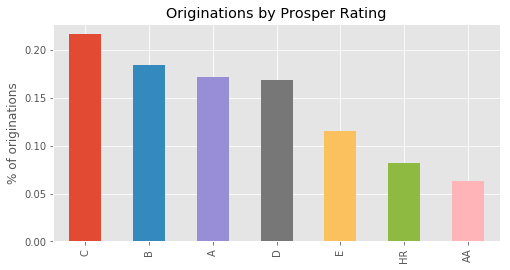

In [141]:
loans_data['ProsperRating (Alpha)'].value_counts(normalize=True)*100, loans_data['ProsperRating (Alpha)'].value_counts(normalize=True).plot(kind='bar', sort_columns=True, figsize=[8,4], title='Originations by Prosper Rating').set_ylabel('% of originations')

The most frequent Rating is C (21.61%) followed by B (18.38%) and C (17.12%).

#### Originations by Employment Status

Text(0.5, 1.0, 'Proportion of Originations by Employment Status')

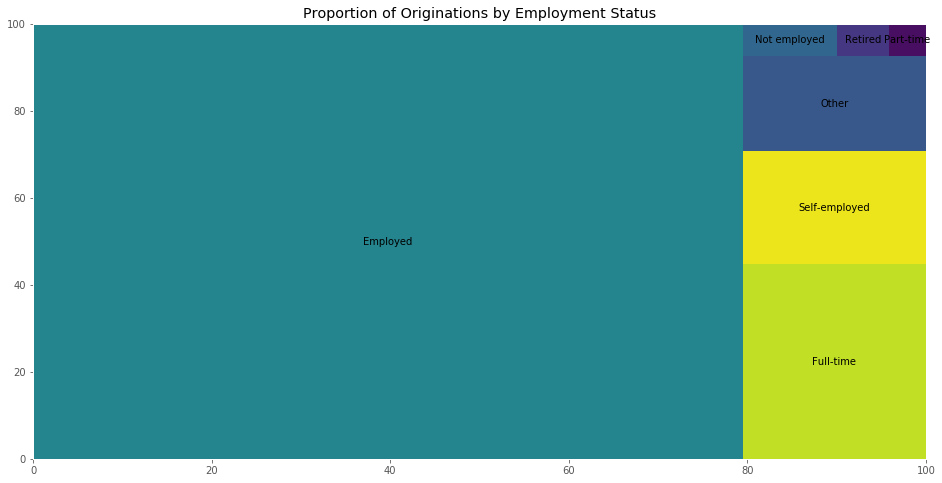

In [142]:
plt.figure(figsize=(16,8))
sizes=loans_data['EmploymentStatus'].value_counts(normalize=True).values
label=loans_data['EmploymentStatus'].value_counts(normalize=True).index
squarify.plot(sizes=sizes, label=label)
plt.title('Proportion of Originations by Employment Status')

In [143]:
#Proportion of originations by EmploymentStatus
loans_data['EmploymentStatus'].value_counts(normalize=True)*100

Employed         79.496628
Full-time         9.162740
Self-employed     5.353789
Other             4.495152
Not employed      0.764152
Retired           0.429909
Part-time         0.297630
Name: EmploymentStatus, dtype: float64

Most of Propsper borrowers stated to be employed or receive and only the 0.76% does not ha an occupation.

#### Originations by IsBorrowerHomeowner

(True     52.84815
 False    47.15185
 Name: IsBorrowerHomeowner, dtype: float64, Text(0, 0.5, '% of originations'))

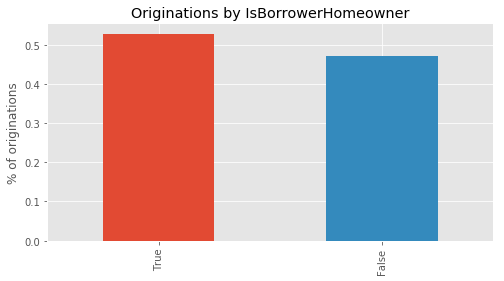

In [144]:
loans_data['IsBorrowerHomeowner'].value_counts(normalize=True)*100, loans_data['IsBorrowerHomeowner'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by IsBorrowerHomeowner').set_ylabel('% of originations')

The 52.85% of Prosper borrowers own a home or has a related mortgage.

#### Originations by Listing Category

(Debt Consolidation    62.697091
 Other                 10.839859
 Home Improvement       8.011197
 Business               6.241954
 Auto                   2.633786
 Household Expanses     2.357415
 Medical/Dental         1.797588
 Taxes                  1.045247
 Large Purchases        1.034617
 Wedding Loans          0.910605
 Vacation               0.907062
 Motorcycle             0.359045
 Student Use            0.310621
 Engagement Ring        0.256292
 Baby&Adoption          0.235033
 Cosmetic Procedure     0.107477
 Boat                   0.100391
 Green Loans            0.069683
 RV                     0.061416
 Not Available          0.023621
 Name: ListingCategory, dtype: float64, Text(0, 0.5, '% of originations'))

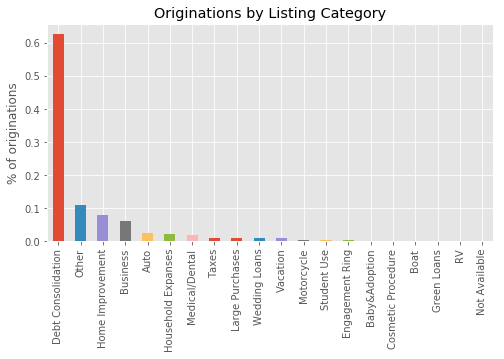

In [145]:
loans_data['ListingCategory'].value_counts(normalize=True)*100, loans_data['ListingCategory'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by Listing Category').set_ylabel('% of originations')

The most frequent reason of a loan is by far debt consolidation (62.70%).

#### Originations by PastProsperBorrower

(No     76.757727
 Yes    23.242273
 Name: PastProsperBorrower, dtype: float64, Text(0, 0.5, '% of originations'))

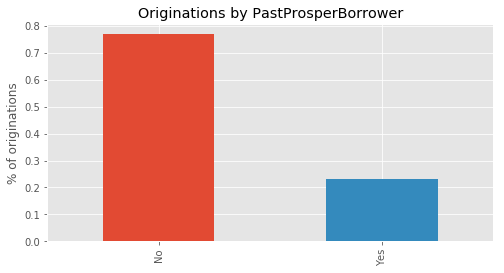

In [146]:
loans_data['PastProsperBorrower'].value_counts(normalize=True)*100, loans_data['PastProsperBorrower'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by PastProsperBorrower').set_ylabel('% of originations')

Only the 23.24% of borrowers is already has or have had a loan with Prosper.

### 6.3 Bivariate Visualizations

#### Origination Rate across Rating Categories

Text(0.5, 1.0, 'Origination Rate Across Rating Categories')

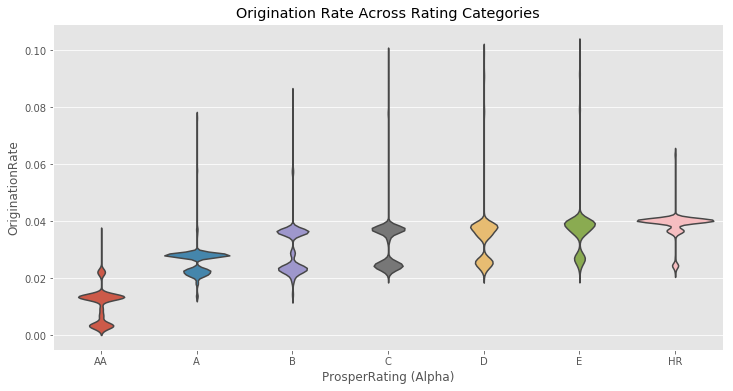

In [147]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loans_data, x='ProsperRating (Alpha)', y='OriginationRate', inner= None, order=['AA','A','B','C','D','E','HR']).set_title('Origination Rate Across Rating Categories')

As the Origination Rate is related to the risk profile of the borrower, it is possible to notice the it increases as the loans become riskier. Regarding the distribution, it become more spread out as the risk profile increases.

#### Origination Fees across Rating Categories

In [227]:
#% of origination fees by Rating
loans_data.groupby('ProsperRating (Alpha)')['OriginationFee'].sum()/loans_data['OriginationFee'].sum()*100

ProsperRating (Alpha)
A     19.541516
AA     3.312872
B     23.631980
C     26.564668
D     15.221770
E      7.512729
HR     4.214464
Name: OriginationFee, dtype: float64

Text(0, 0.5, 'OriginationFee')

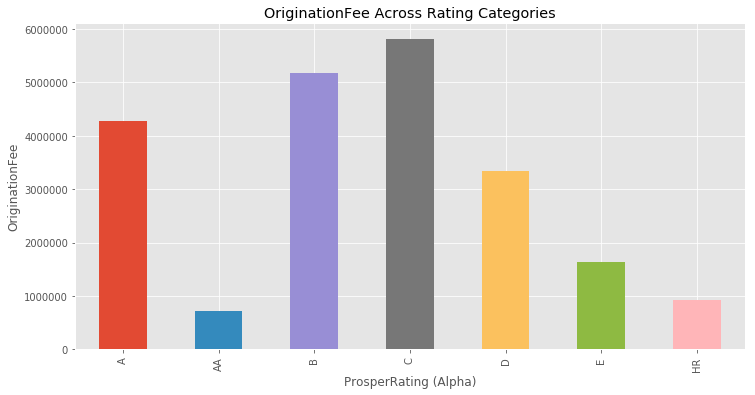

In [225]:
plt.figure(figsize=[12,6])
loans_data.groupby('ProsperRating (Alpha)')['OriginationFee'].sum().plot(kind='bar', title='OriginationFee Across Rating Categories').set_ylabel('OriginationFee')

The Rating Category that generates most Origination Fees is C which also the most frequent. The distribution of Origination Fees across the Rating Categories follows the amount of loans originated by each category.

#### Origination Rate across Loan Term

Text(0.5, 1.0, 'Origination Rate across Loan Terms')

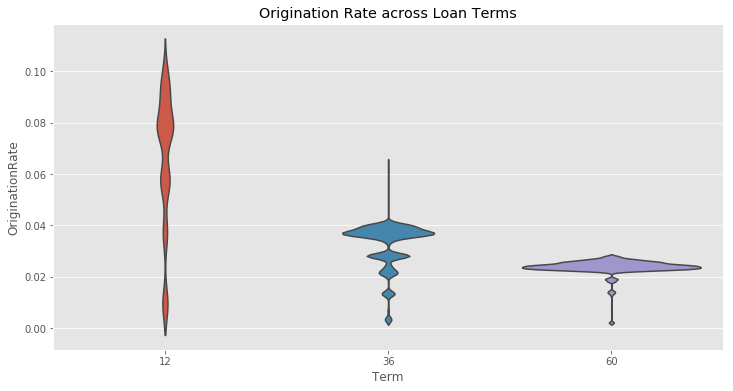

In [149]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loans_data, x='Term', y='OriginationRate', inner= None).set_title('Origination Rate across Loan Terms')

The distribution of Origination Rate is more spread out for loans with a 12 months term and it decreases as the term increases.

#### Origination Fee across Loan Term

Text(0, 0.5, 'OriginationFee')

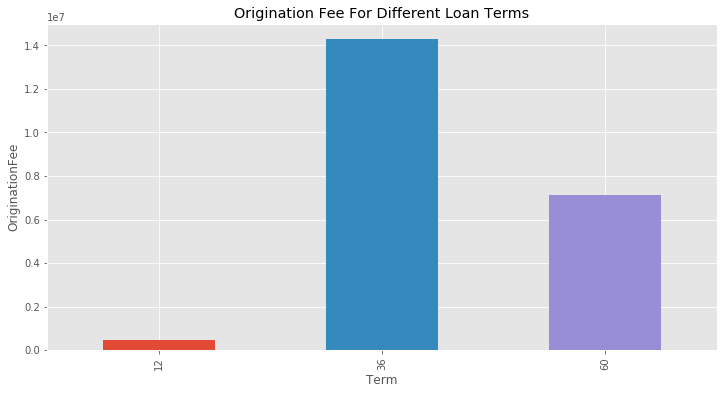

In [150]:
plt.figure(figsize=[12,6])
loans_data.groupby('Term')['OriginationFee'].sum().plot(kind='bar', title='Origination Fee For Different Loan Terms').set_ylabel('OriginationFee')

Most of Origination Fees are generated by loans with a 36 months term, which are also the more frequent. The distribution of Origination Fees generated across different loan term follow the amount of loans originated for each category.

#### Origination Fees across Listing Categories

In [228]:
#% Origination fees by listing category
loans_data.groupby('ListingCategory')['OriginationFee'].sum()/loans_data['OriginationFee'].sum()*100

ListingCategory
Auto                   1.540786
Baby&Adoption          0.247794
Boat                   0.096102
Business               6.115706
Cosmetic Procedure     0.083671
Debt Consolidation    70.311530
Engagement Ring        0.227861
Green Loans            0.064166
Home Improvement       7.064253
Household Expanses     1.541565
Large Purchases        0.992663
Medical/Dental         1.367367
Motorcycle             0.237401
Not Available          0.016690
Other                  7.505475
RV                     0.054378
Student Use            0.078149
Taxes                  0.927503
Vacation               0.594693
Wedding Loans          0.932248
Name: OriginationFee, dtype: float64

Text(0.5, 0, 'Origination Fees')

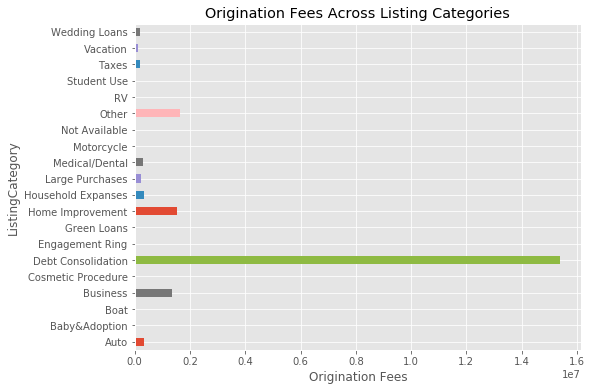

In [151]:
plt.figure(figsize=[12,6])
loans_data.groupby('ListingCategory')['OriginationFee'].sum().plot(kind='barh', title='Origination Fees Across Listing Categories', figsize=[8,6]).set_xlabel('Origination Fees')

The listing category that generates the most of Origination Fees is debt consolidation (70.31%) which is also the most frequent.

#### Estimated Returns across Rating Categories

In [233]:
#Median of estimated return across Rating Categories
loans_data.groupby('ProsperRating (Alpha)')['EstimatedReturn'].median().sort_values(ascending=True)

ProsperRating (Alpha)
AA    0.05100
A     0.06663
B     0.08215
C     0.09220
D     0.11630
HR    0.12210
E     0.12370
Name: EstimatedReturn, dtype: float64

Text(0.5, 1.0, 'Distribution of Estimated Returns across Rating Categories')

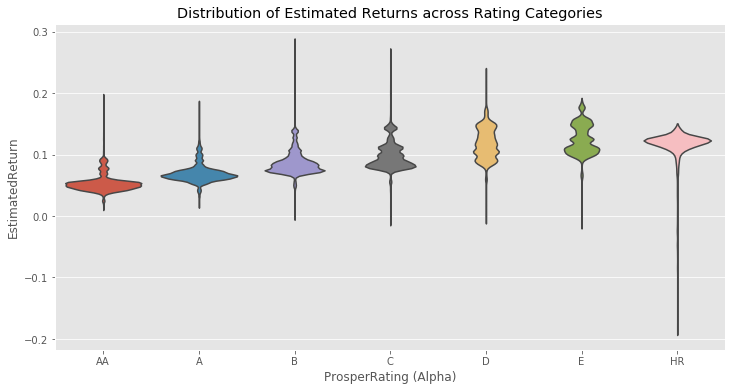

In [230]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loans_data, x='ProsperRating (Alpha)', y='EstimatedReturn',inner= None, order=['AA','A','B','C','D','E','HR']).set_title('Distribution of Estimated Returns across Rating Categories')

The median return increases as the risk profile increases, except for E which has a higher median return than HR. It may be due to the fact the HR loans have an higher estimated loss that affects the estimated returns.

#### Estimated Returns across Loan Term

Text(0.5, 1.0, 'Estimated Returns across Loan Term')

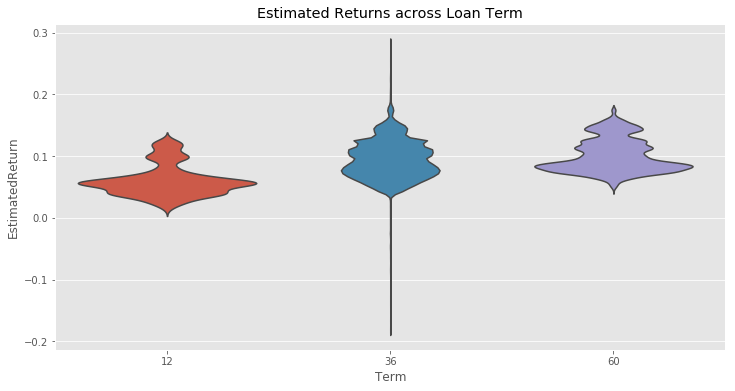

In [153]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loans_data, x='Term', y='EstimatedReturn', inner= None).set_title('Estimated Returns across Loan Term')

The median return increases along with the loan term. The distribution of the 36 months term loans is more spread out. It may be due to the fact that this is the most frequent loan term category and therefore it contains more outliers tha the others.

#### Loan Amounts across Loan Terms

In [234]:
#Median amounts across loan terms
loans_data.groupby('Term')['LoanOriginalAmount'].median().sort_values(ascending=True)

Term
12     3500
36     5500
60    11500
Name: LoanOriginalAmount, dtype: int64

Text(0.5, 1.0, 'Loan Amounts across Loan Terms')

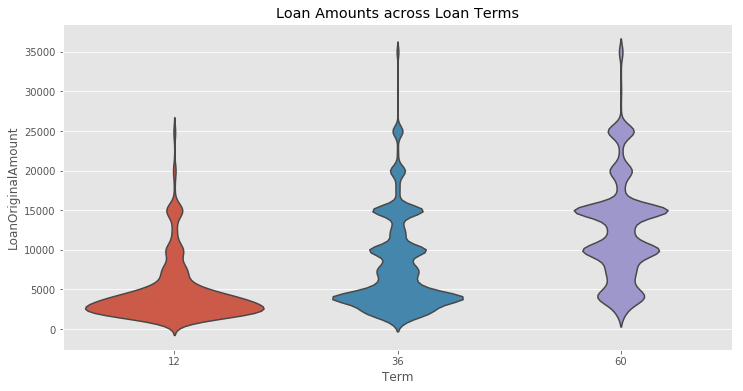

In [155]:
plt.figure(figsize=[12,6])
sns.violinplot(x='Term', y='LoanOriginalAmount', data=loans_data, inner=None).set_title('Loan Amounts across Loan Terms')

The median amount increases as the loan term increases.

### 6.4 Multivariate Exploratory Data Analysis

#### Loan Amounts across Rating Categories and Loan Terms

In [346]:
#Table of % of loan amounts across Rating Categories and Loan Terms
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loans_data['LoanOriginalAmount'].sum()*100

ProsperRating (Alpha)  Term
A                      36      14.613994
C                      60      12.921373
B                      60      11.885583
C                      36      11.639414
B                      36      11.416730
D                      36       7.882927
A                      60       6.837326
AA                     36       6.514975
D                      60       5.076855
E                      36       4.400123
HR                     36       3.115434
AA                     60       1.420762
E                      60       1.290663
B                      12       0.201051
C                      12       0.179669
A                      12       0.178061
D                      12       0.161502
E                      12       0.140258
AA                     12       0.123300
Name: LoanOriginalAmount, dtype: float64

Text(0, 0.5, '% of total amount granted')

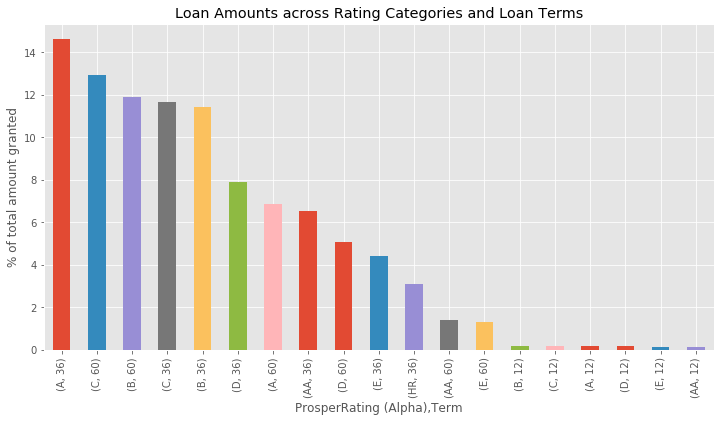

In [349]:
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loans_data['LoanOriginalAmount'].sum()*100).plot(kind='bar',figsize=(12,6), title=('Loan Amounts across Rating Categories and Loan Terms')).set_ylabel('% of total amount granted')

Most of the loan origination amount have been granted for the following loans:
- A36: 14.61%
- C60: 12.92%
- B60: 11.88%

#### Originations across Rating Categories and Loan Terms

In [339]:
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loans_data.shape[0]*100

ProsperRating (Alpha)  Term
A                      36      12.546505
C                      36      11.974867
D                      36      11.550863
B                      36      10.617818
C                      60       9.330452
E                      36       8.974950
HR                     36       8.176546
B                      60       7.393497
AA                     36       5.264028
D                      60       4.928604
A                      60       4.273111
E                      60       2.236946
AA                     60       0.826749
B                      12       0.373218
D                      12       0.348416
E                      12       0.340148
A                      12       0.317708
C                      12       0.311802
AA                     12       0.213774
Name: OriginationFee, dtype: float64

Text(0, 0.5, '% of total originations')

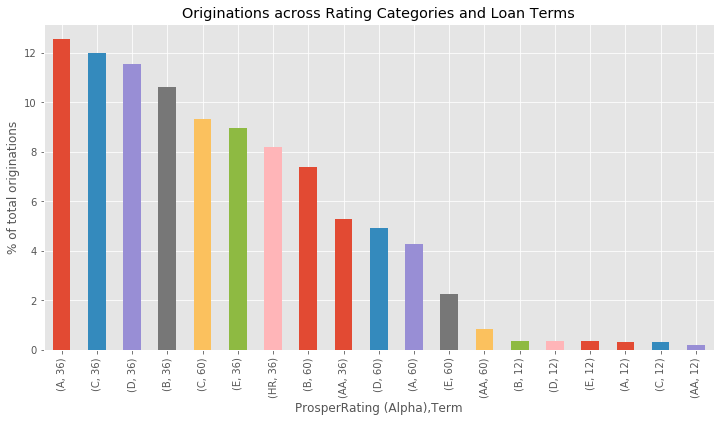

In [350]:
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loans_data.shape[0]*100).plot(kind='bar',figsize=(12,6), title=('% of Originations across Rating Categories and Loan Terms')).set_ylabel('% of total originations')

Most of loans have been generated across the following classes:

- A36: 12.55%
- C36: 11.97%
- D36: 11.55%

#### Origination Fees Generated Across Rating Categories and Loan Terms

In [293]:
#%of origination fees generated by loan classes
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100

ProsperRating (Alpha)  Term
C                      36      14.950560
A                      36      13.986565
B                      36      13.591879
C                      60      11.106795
D                      36      10.159548
B                      60       9.620646
E                      36       5.865110
A                      60       5.269858
D                      60       4.575890
HR                     36       4.214464
AA                     36       2.478525
E                      60       1.217090
AA                     60       0.793596
C                      12       0.507313
D                      12       0.486333
E                      12       0.430529
B                      12       0.419456
A                      12       0.285093
AA                     12       0.040751
Name: OriginationFee, dtype: float64

Text(0, 0.5, '% of origination fees')

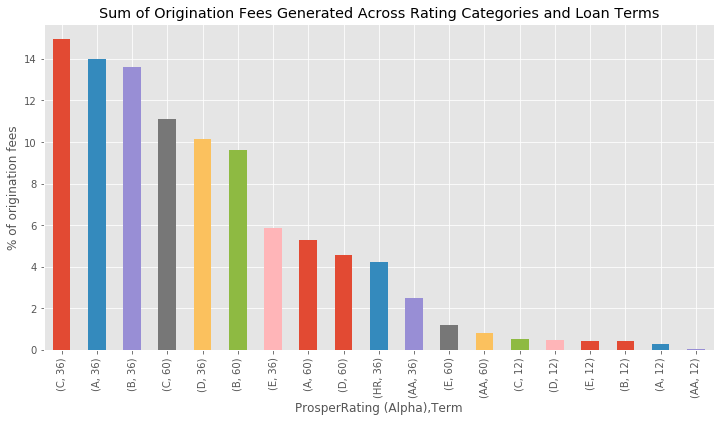

In [351]:
plt.figure(figsize=[12,6]) 
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100).plot(kind='bar', figsize=(12,6), title=('% of Origination Fees Generated Across Rating Categories and Loan Terms')).set_ylabel('% of origination fees')

The loans that generated most Origination Fees are C36, A36 and B36.

Text(0, 0.5, 'Origination Fee ($)')

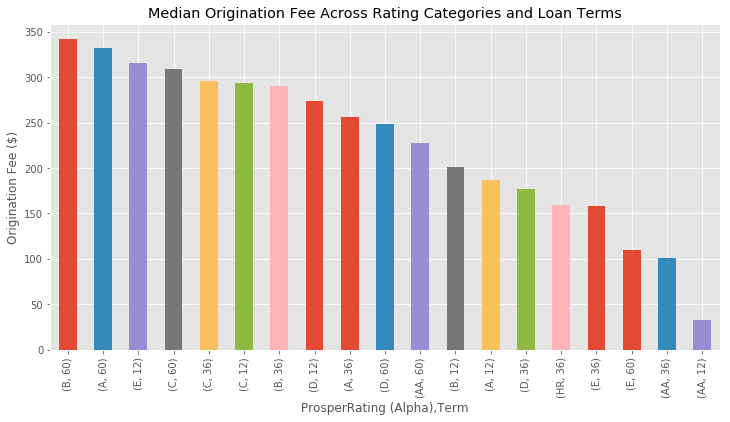

In [239]:
plt.figure(figsize=[12,6]) 
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].median().sort_values(ascending=False).plot(kind='bar', title=('Median Origination Fee Across Rating Categories and Loan Terms')).set_ylabel('Origination Fee ($)')

In [160]:
#Table of Median Origination Fee Across Rating Categories and Loan Terms
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].median().sort_values(ascending=False)

ProsperRating (Alpha)  Term
B                      60      341.678775
A                      60      331.950000
E                      12      315.880000
C                      60      308.880000
                       36      295.200000
                       12      293.625000
B                      36      290.000000
D                      12      273.450000
A                      36      255.870000
D                      60      248.600000
AA                     60      226.922500
B                      12      200.690000
A                      12      186.550000
D                      36      177.100000
HR                     36      159.320000
E                      36      157.840000
                       60      109.520000
AA                     36      100.500000
                       12       32.865000
Name: OriginationFee, dtype: float64

The loans that have the highest median Origination Fee are B60 (341.68 USD), A60 (331.95 USD) and E12 (315.88 USD).

#### Median Estimated Returns Across Rating Categories and Loan Terms

Text(0, 0.5, 'Mean Estimated Return')

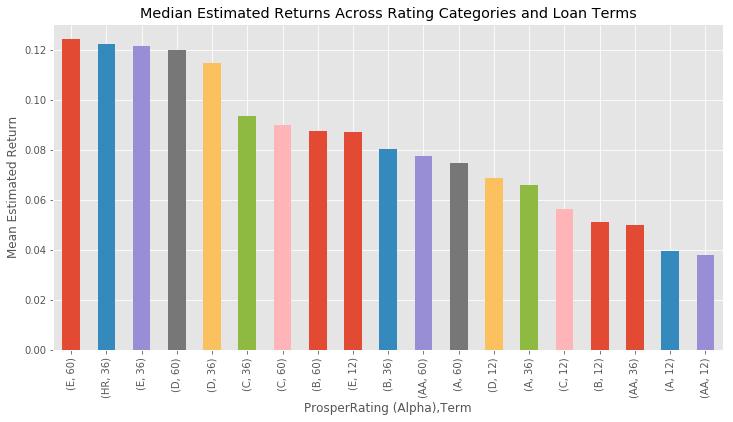

In [241]:
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Median Estimated Returns Across Rating Categories and Loan Terms').set_ylabel('Mean Estimated Return')

In [242]:
#Table of median estimated returns
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False)*100

ProsperRating (Alpha)  Term
E                      60      12.42
HR                     36      12.21
E                      36      12.16
D                      60      11.99
                       36      11.45
C                      36       9.36
                       60       8.98
B                      60       8.76
E                      12       8.71
B                      36       8.03
AA                     60       7.76
A                      60       7.48
D                      12       6.88
A                      36       6.57
C                      12       5.63
B                      12       5.10
AA                     36       4.98
A                      12       3.94
AA                     12       3.81
Name: EstimatedReturn, dtype: float64

As the distributions are very spread out, in order to better give an idea of the estimated returns, the median has been chosen. The loans tha offer the highest median estimated returns are E60 (12.42%), HR36 (12.21%) and E36 (12.16%).

#### Top loan classes by Originations, Origination Fees and Loan Amounts

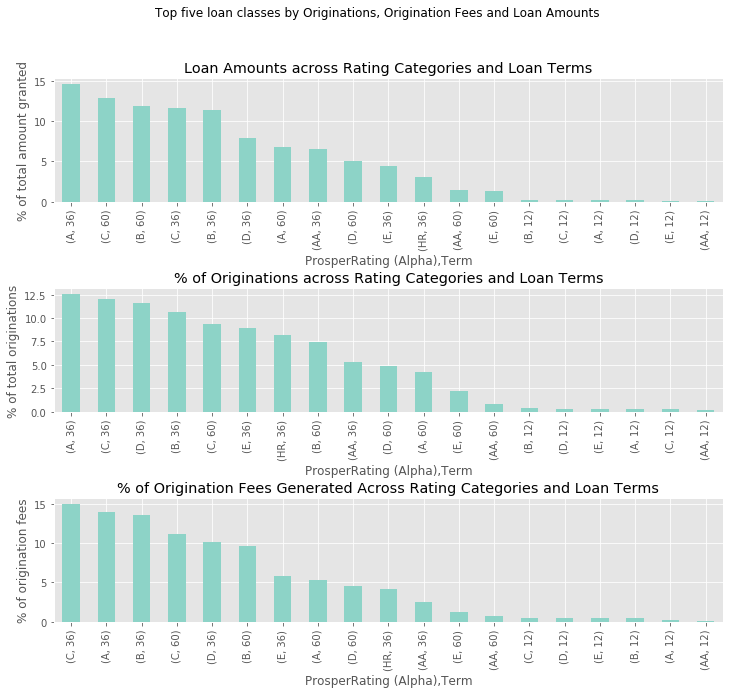

In [409]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loans_data['LoanOriginalAmount'].sum()*100).plot(kind='bar',title=('Loan Amounts across Rating Categories and Loan Terms'), ax=ax1, colormap='Set3').set_ylabel('% of total amount granted')
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loans_data.shape[0]*100).plot(kind='bar', title=('% of Originations across Rating Categories and Loan Terms'), ax=ax2, colormap='Set3').set_ylabel('% of total originations')
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100).plot(kind='bar', title=('% of Origination Fees Generated Across Rating Categories and Loan Terms'), ax=ax3, colormap='Set3').set_ylabel('% of origination fees')
plt.suptitle('Top five loan classes by Originations, Origination Fees and Loan Amounts')
plt.subplots_adjust(wspace = 0.9, hspace = 0.7)

Considering the percentage of origination fees, amount granted and amount of origination, the top positions are covered by the same classes of loans. For the purpose of the analysis the loans that are going to be picked as most profitable are those that generated the highest proportion of Origination Fees which is the main metric to ascertain whether a loan is profitable for Prosper or not.

#### Median number of Investors across Rating Categories and Loan Terms

Text(0, 0.5, 'Median number if investors')

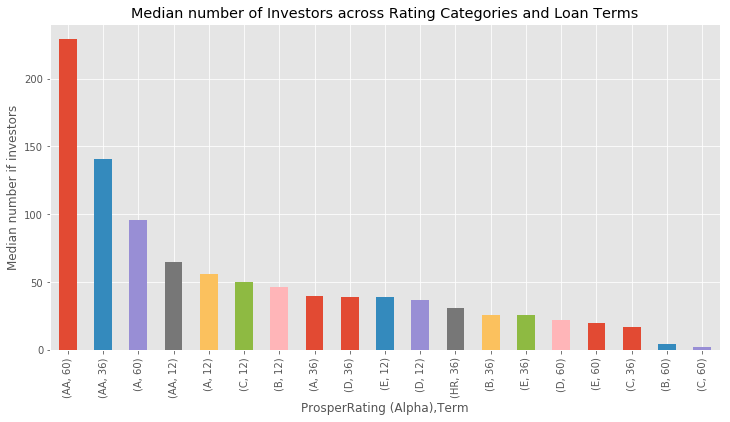

In [375]:
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['Investors'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Median number of Investors across Rating Categories and Loan Terms').set_ylabel('Median number if investors')

The loans classes that attracted the highest number of investors are those with a lower risk profile.

### Loan Picking

The best loans are those that offer a good trade off between Origination Fees and Estimated Returns. 

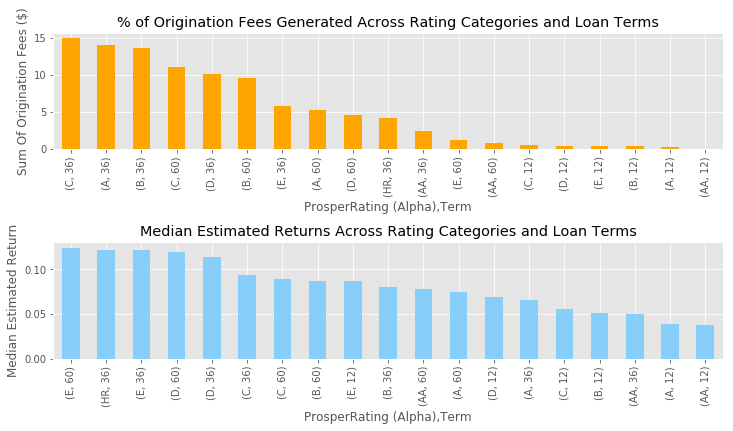

In [369]:
fig=plt.figure(figsize=[20,12])
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100).plot(kind='bar', figsize=(12,6), ax=ax1, title='% of Origination Fees Generated Across Rating Categories and Loan Terms', color='orange').set_ylabel('Sum Of Origination Fees ($)')
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ax=ax2, title='Median Estimated Returns Across Rating Categories and Loan Terms', color='lightskyblue').set_ylabel('Median Estimated Return')
plt.subplots_adjust(hspace=0.8)

The most profitable loans are:

- C36
- A36
- B36
- C60
- D36
- B60

In [164]:
#Create dataframe with most profitable loans for further profiling of borrowers
C36 = loans_data[(loans_data['ProsperRating (Alpha)']=='C')&(loans_data['Term']==36)]
A36 = loans_data[(loans_data['ProsperRating (Alpha)']=='A')&(loans_data['Term']==36)]
B36 = loans_data[(loans_data['ProsperRating (Alpha)']=='B')&(loans_data['Term']==36)]
C60 = loans_data[(loans_data['ProsperRating (Alpha)']=='C')&(loans_data['Term']==60)]
D36 = loans_data[(loans_data['ProsperRating (Alpha)']=='D')&(loans_data['Term']==36)]
B60 = loans_data[(loans_data['ProsperRating (Alpha)']=='B')&(loans_data['Term']==60)]

In [165]:
#Create dataframe with most profitable loans for further profiling of borrowers
profitable_loans=pd.concat([C36,A36,B36,C60,D36,B60], ignore_index=True)
profitable_loans.head()

,Unnamed: 0,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,...,StatedMonthlyIncome,TotalProsperLoans,ProsperPrincipalBorrowed,LoanOriginalAmount,LoanOriginationQuarter,Investors,OriginationRate,OriginationFee,ListingCategory,PastProsperBorrower
0,7,0F1035772717087366F9EA7,2013-05-05 06:49:27.493,36,Current,0.23939,0.2019,0.09840,C,4.0,...,3355.750000,NaN,NaN,10000,Q2 2013,1,0.03749,374.90,Home Improvement,No
1,24,101B3596709094692AC79C0,2013-12-03 11:34:46.127,36,Current,0.19859,0.1620,0.07766,C,5.0,...,2333.333333,NaN,NaN,4000,Q4 2013,1,0.03659,146.36,Debt Consolidation,No
2,28,0F53359346357513247D86B,2013-11-02 16:01:28.050,36,Current,0.20268,0.1660,0.08421,C,4.0,...,3600.000000,NaN,NaN,10000,Q4 2013,1,0.03668,366.80,Home Improvement,No
3,34,0F6C3603015887476F3F015,2014-02-24 12:55:20.430,36,Current,0.22966,0.1920,0.07820,C,5.0,...,4058.333333,NaN,NaN,10000,Q1 2014,1,0.03766,376.60,Debt Consolidation,No
4,43,10B93591610781064F9C46B,2013-10-08 13:48:43.950,36,Current,0.21290,0.1760,0.08529,C,6.0,...,4333.333333,NaN,NaN,5000,Q4 2013,5,0.03690,184.50,Debt Consolidation,No


In [402]:
#save dataframe
profitable_loans.to_csv('profitable_loans')

In [166]:
#% of origination fees generated by profitable loans
profitable_loans['OriginationFee'].sum()/loans_data['OriginationFee'].sum()*100

73.41599272238196

In [167]:
#% of profitable loans
profitable_loans.shape[0]/loans_data.shape[0]

0.6341400040156374

In [168]:
#% of low risk profitable loans A36
A36.shape[0]/loans_data.shape[0]*100

12.54650462388832

In [169]:
#% of origination fees generated by low risk profitable loans A36
A36['OriginationFee'].sum()/loans_data['OriginationFee'].sum()*100

13.986565254575684

The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The low risk profitable loans (A36) are the 12.5% of the total loans and generate the 14% of Origination Fees.

In [265]:
#% of origination fees acroos profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum()/loans_data['OriginationFee'].sum()*100

ProsperRating (Alpha)  Term
A                      36      13.986565
B                      36      13.591879
                       60       9.620646
C                      36      14.950560
                       60      11.106795
D                      36      10.159548
Name: OriginationFee, dtype: float64

In [263]:
#% of originations across profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count()/loans_data.shape[0]*100

ProsperRating (Alpha)  Term
A                      36      12.546505
B                      36      10.617818
                       60       7.393497
C                      36      11.974867
                       60       9.330452
D                      36      11.550863
Name: OriginationFee, dtype: float64

The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees. 

|Propsper Rating & Loan Term|% of originations|% of Origination Fees|
|---------------------------|:---------------:|:-------------------:|
|A36                        |12.55            |13.99                |   
|B36                        |10.62            |13.59                |   
|B60                        |7.39             |9.62                 |   
|C36                        |11.97            |14.95                |    
|C60                        |9.33             |11.11                |   
|D36                        |11.55            |10.16                |   

#### Origination Fees and total loan originations across profitable loans and rest of loans

Text(0.5, 0.98, 'Origination Fees and total loan originations across profitable loans and rest of loans')

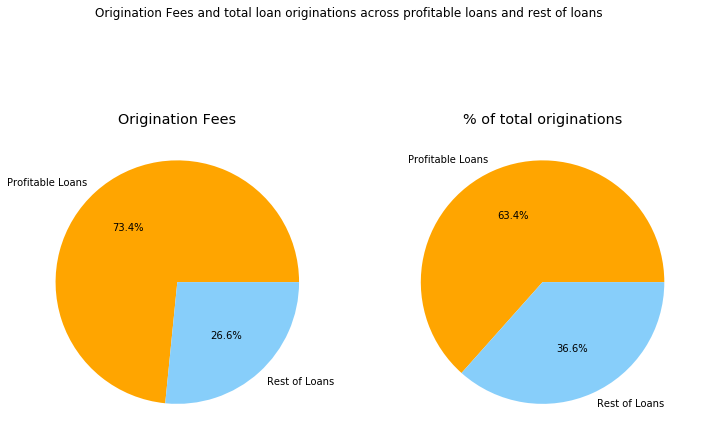

In [270]:
fig=plt.figure(figsize=[12,8])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie([profitable_loans['OriginationFee'].sum(),loans_data['OriginationFee'].sum()-profitable_loans['OriginationFee'].sum()],labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%', colors = ['orange', 'lightskyblue'])
ax1.set_title('Origination Fees')
ax2.pie([profitable_loans.shape[0],loans_data.shape[0]-profitable_loans.shape[0]], labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%',colors = ['orange', 'lightskyblue'])
ax2.set_title('% of total originations')
fig.suptitle('Origination Fees and total loan originations across profitable loans and rest of loans')

#### IsBorrowerHomeOwner across Rating Categories and Loan Terms

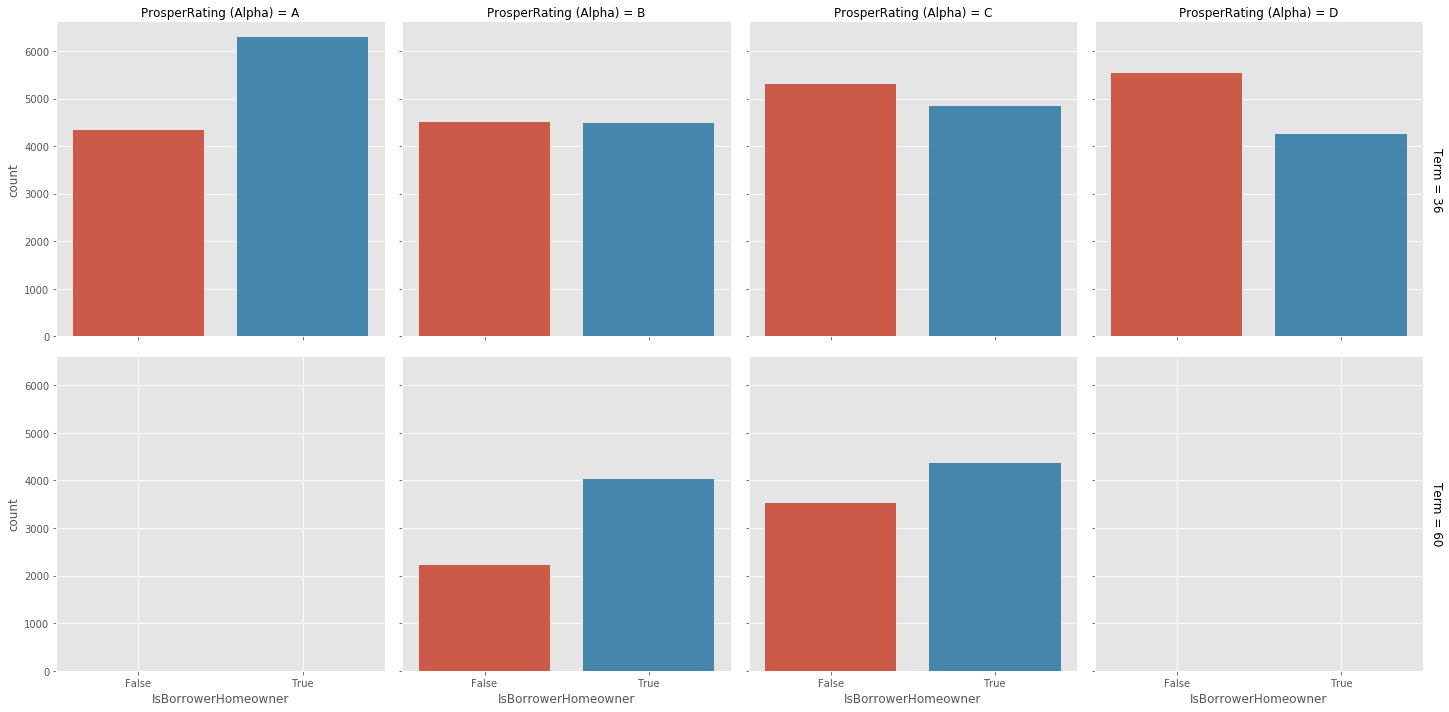

In [281]:
g=sns.catplot('IsBorrowerHomeowner', data=profitable_loans, col='ProsperRating (Alpha)', row='Term',  kind='count', col_order=['A','B','C','D'], margin_titles=True)

As the profile risk of the loan increases, the proportion of non homeowners increases.

#### Employment Status across Rating Categories and Loan Terms

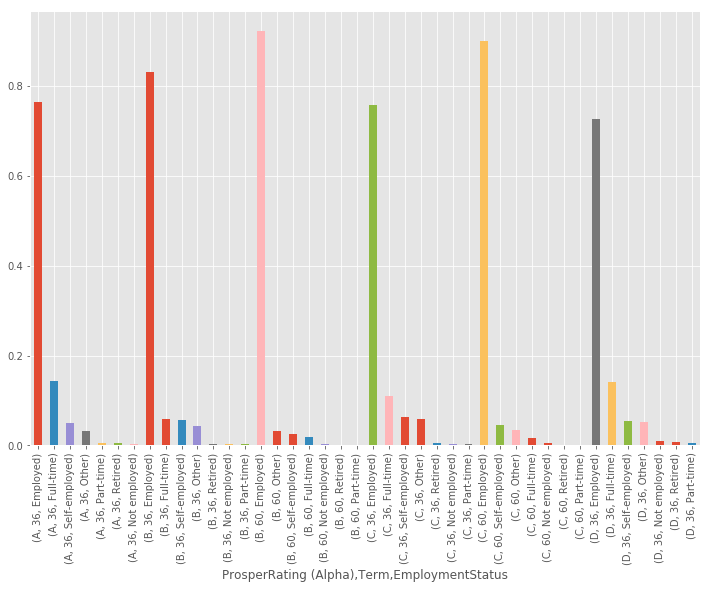

In [289]:
plt.figure(figsize=(12,8))
profitable_loans.groupby(['ProsperRating (Alpha)','Term'])['EmploymentStatus'].value_counts(normalize=True).plot(kind='bar')

The rate of not employed borrowers slightly increases as the risk profile increases.

#### Past Prosper Borrowers across Rating Categories and Loan Terms

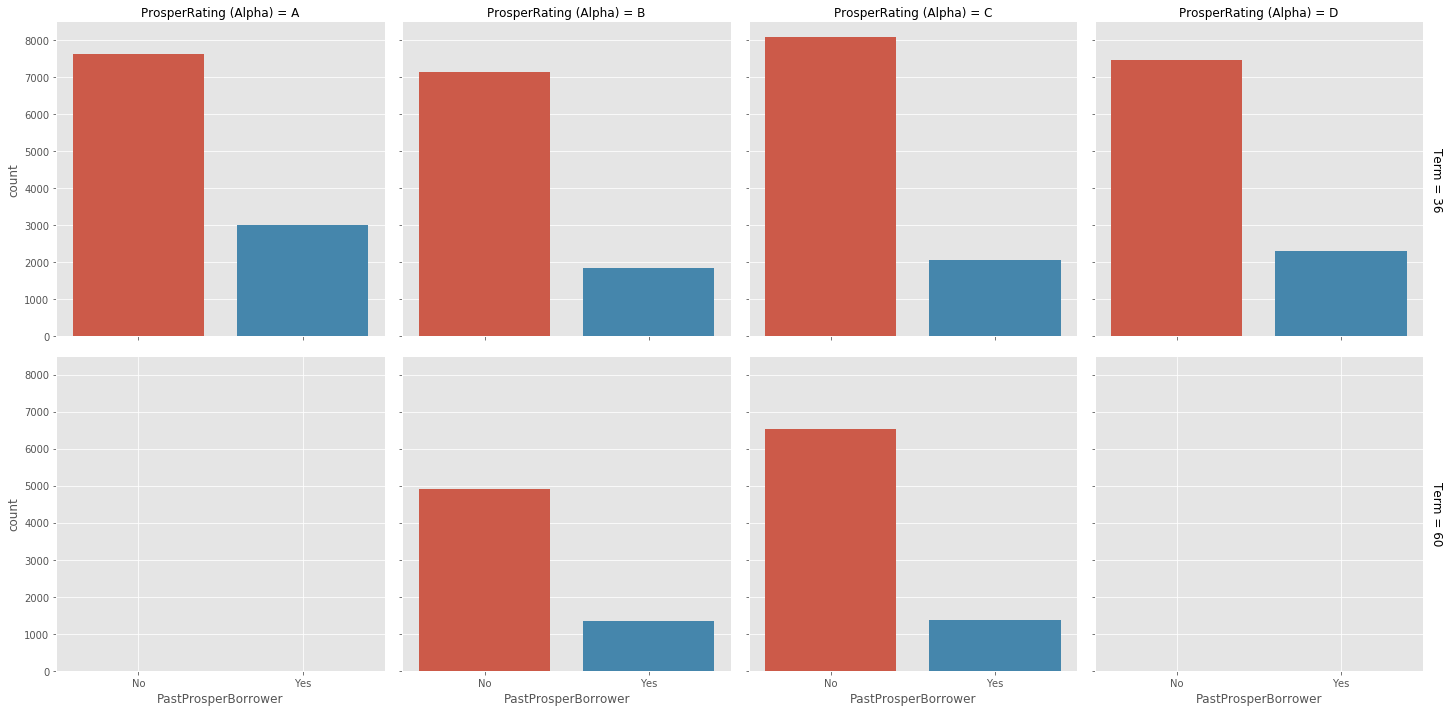

In [283]:
g=sns.catplot('PastProsperBorrower', data=profitable_loans, col='ProsperRating (Alpha)', row='Term',  kind='count', col_order=['A','B','C','D'], margin_titles=True)

There is no clear trend for this distribution.

#### Stated Monthly Income across Rating Categories and Loan Terms

In [376]:
#Desciptive statistics for StatedMonthlyIncome across profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)','Term'])['StatedMonthlyIncome'].describe()

count         mean          std  min  \
ProsperRating (Alpha) Term                                           
A                     36    10623.0  6685.947386  4563.130586  0.0   
B                     36     8990.0  6201.922228  4729.691429  0.0   
                      60     6260.0  6767.375799  4191.231684  0.0   
C                     36    10139.0  5718.118388  5940.499627  0.0   
                      60     7900.0  5967.962373  3932.877467  0.0   
D                     36     9780.0  5144.554124  3637.349564  0.0   

                                    25%          50%          75%  \
ProsperRating (Alpha) Term                                          
A                     36    4074.500000  5733.333333  8083.333333   
B                     36    3591.666667  5166.666667  7500.000000   
                      60    4184.770833  5833.333333  8333.333333   
C                     36    3333.333333  4750.000000  6750.000000   
                      60    3750.000000  5166.666667  7083.333333   
D                     36    3000.000000  4333.333333  6250.729167   

                                      max  
ProsperRating (Alpha) Term                 
A                     36     91666.666667  
B                     36     83333.333333  
                      60    108750.000000  
C                     36    394400.000000  
                      60     78364.416667  
D                     36     83333.333333

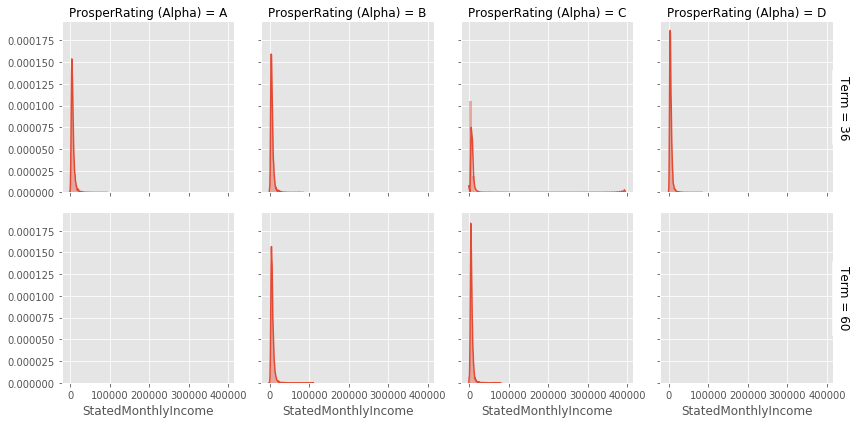

In [173]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'StatedMonthlyIncome')

There is no clear trend for these distributions.

#### Current Credit Lines across Rating Categories and Loan Terms

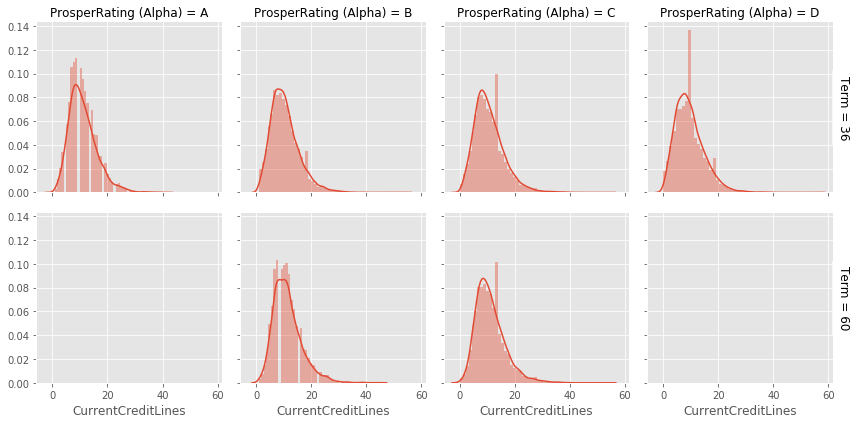

In [49]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'CurrentCreditLines')

There is no clear trend for these distributions.

#### Open Credit lines across Rating Categories and Loan Terms

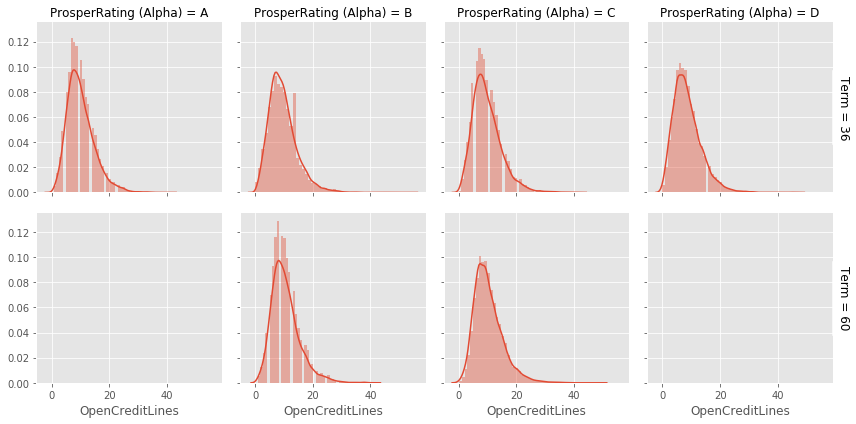

In [50]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'OpenCreditLines')

There is no clear trend for these distributions.

#### Current Delinquencies across Rating Categories and Loan Terms

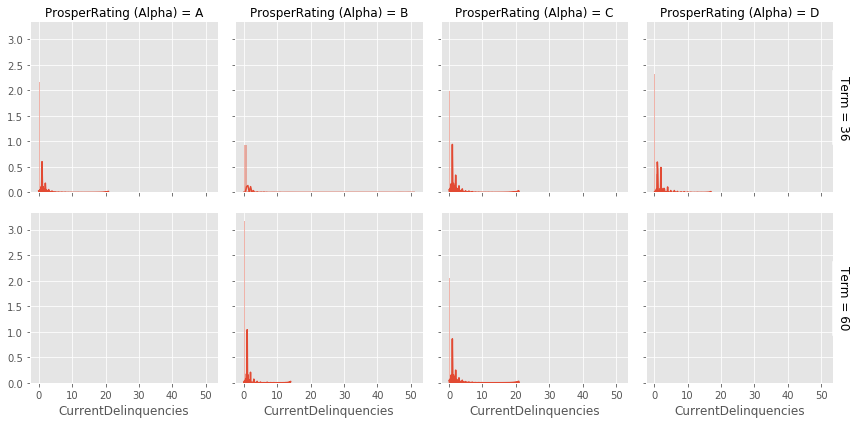

In [260]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'CurrentDelinquencies')

There is no clear trend for these distributions.

#### Total Inquiries across Rating Categories and Loan Terms

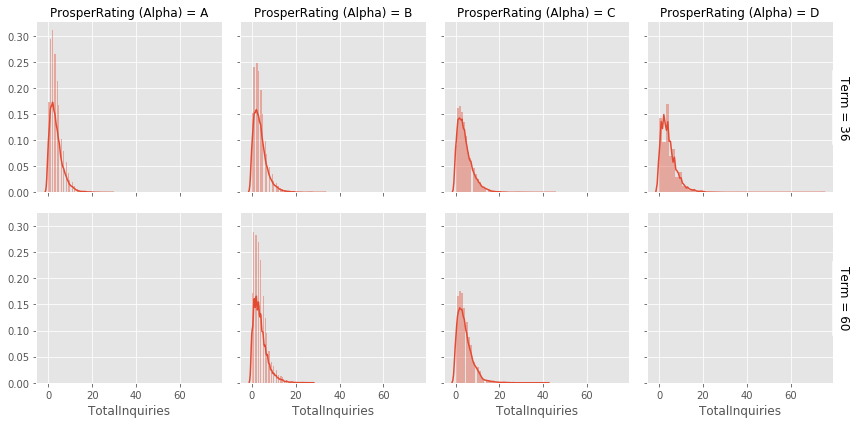

In [52]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'TotalInquiries')

As it is not possible to spot any trend in the above charts, the median values of each variable are going to be computed and compared across Rating Categories and Loan Terms.

#### Median Values of Credit History Variables Across Rating Categories and Loan Terms

In [297]:
#Table of credit history variables
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median()

CurrentCreditLines  OpenCreditLines  \
ProsperRating (Alpha) Term                                        
A                     36                  10.0              9.0   
B                     36                  10.0              9.0   
                      60                  11.0             10.0   
C                     36                  10.0              9.0   
                      60                  10.0              9.0   
D                     36                   9.0              8.0   

                            TotalInquiries  CurrentDelinquencies  
ProsperRating (Alpha) Term                                        
A                     36               3.0                   0.0  
B                     36               3.0                   0.0  
                      60               3.0                   0.0  
C                     36               3.0                   0.0  
                      60               3.0                   0.0  
D                     36               4.0                   0.0

<Figure size 864x432 with 0 Axes>

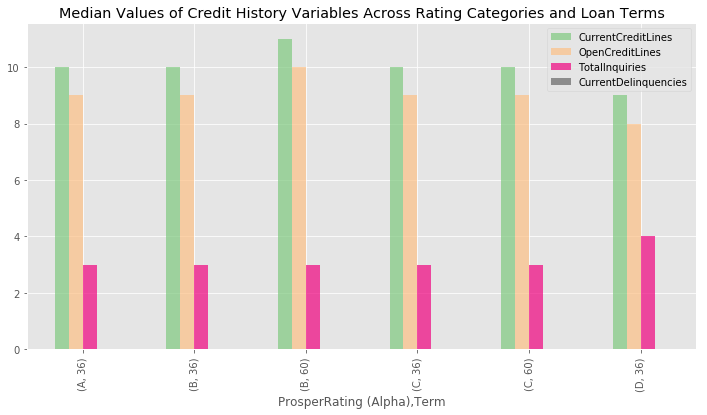

In [413]:
plt.figure(figsize=(12,6))
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median().plot(kind='bar',figsize=(12,6), title='Median Values of Credit History Variables Across Rating Categories and Loan Terms', colormap='Accent', alpha=0.7)

There is no clear trend regarding the number of current credit lines and open credit lines. The number of inquires slightly increases in the most risky class D36.

#### Are Borrowers Who Were Already Clients More Profitable?

In [309]:
loans_data.query('PastProsperBorrower=="Yes"')['OriginationRate'].median()*100, loans_data.query('PastProsperBorrower=="No"')['OriginationRate'].median()*100

(2.798, 2.8690000000000015)

Text(0.5, 1.0, 'Are Borrowers Who Were Already Clients More Profitable?')

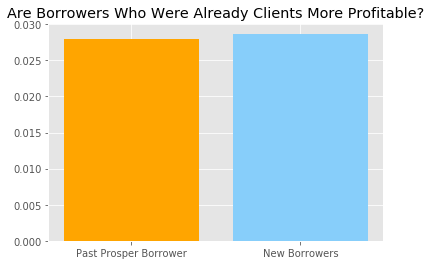

In [306]:
height=[loans_data.query('PastProsperBorrower=="Yes"')['OriginationRate'].median(), loans_data.query('PastProsperBorrower=="No"')['OriginationRate'].median()]
bars=['Past Prosper Borrower', 'New Borrowers']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['orange', 'lightskyblue'])
plt.xticks(y_pos, bars)
plt.title('Are Borrowers Who Were Already Clients More Profitable?')

The median Origination rate of a Prosper past borrower is 2.798% while the median origination fee of a new borrower is 2.869%. It may be due to a lower risk profile because for past borrowers a better profiling is possible as Prosper has more data available on them. In order to ascertain that a further analysis of the distribution of the loan amounts across the abovementioned variable has to be performed.

#### Do Prosper past borrowers have lower Origination Fees?

Text(0.5, 0.98, 'Distribution of Origination Fees across past borrowers (orange) and new borrowers (blue)')

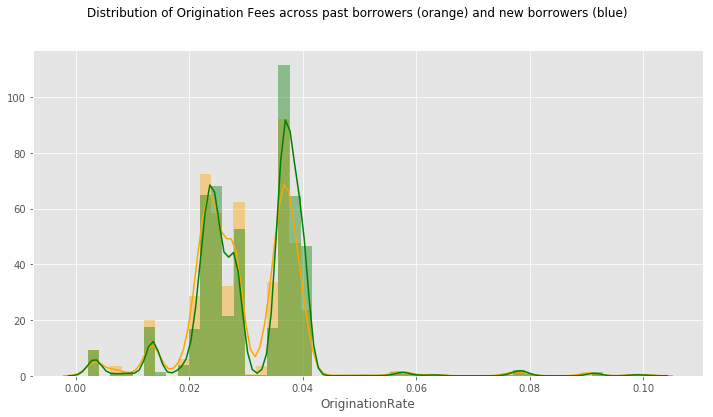

In [414]:
fig=plt.figure(figsize=(12,6))
sns.distplot(loans_data.query('PastProsperBorrower=="Yes"')['OriginationRate'], color='orange' )
sns.distplot(loans_data.query('PastProsperBorrower=="No"')['OriginationRate'], color='green')
fig.suptitle('Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

Past Prosper borrowers are able to obtain on average a slightly lower Origination rate than the new borrowers.

### 7. Conclusions

As a result of the exploratory data analysis it is possible to highlight the following points:

- The 61.1% of the loans have a **term** of 36 months.


- The **majority of the loans** (57.1%) have been generated with the following Ratings:
    - C:21.6%
    - B: 18.38 %
    - A: 17.12%
    
    
- The majority of Prosper borrowers stated to be **employed or retired**, only the 0.72% of the borrowers stated to not have an occupation.


- The 62.7% of the loans have been originated for **debt consolidation**.


- The distribution of the Origination Rate is more spread out as the default risk increases.


- As the Origination Fees are calculated based on the loan amount, the **distribution of the Origination Fees followd the distribution of the loan amounts**. 


- The **majority of the Origination Fees** have by originated by 36 months term loans, which are also the most frequent term.


- The 70.31% of Origination Fees have by generated for loans originated for **debt consolidation**.


- **The median estimeted return increases as the risk profile increses**, except for class E and HR (which has a lower estimated return), due to the fact that HR loans have a higher estimated loss.


- The **Loan classes that have generate the most of Origination Fees** are:
    - C36: 14.95%
    - A36: 13.99%
    - B36: 13.59%
    
    
- The **loans with the highest median Origination Fee** are:
    - B60: 341.68 USD
    - A60: 331.95 USD
    - E12: 315.88 USD
    
    
- The loans that, according to historical data, have generated the most of Origination Fees are: C36, A36, B36, C60, D36 and B60. The **most profitable loans** are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees. 

|Propsper Rating & Loan Term|% of originations|% of Origination Fees|
|---------------------------|:---------------:|:-------------------:|
|A36                        |12.55            |13.99                |   
|B36                        |10.62            |13.59                |   
|B60                        |7.39             |9.62                 |   
|C36                        |11.97            |14.95                |    
|C60                        |9.33             |11.11                |   
|D36                        |11.55            |10.16                |  


- The **proportion of homeowners**, as expected, decreases as the risk profile increses. 


- Regarding the credit history the most discriminating variable is the **number of inquiries**, which slightly increases as the profile risk increases. 


- The **past Prosper borrowers are able to obtain a slightly lower Origination rate**, which may be due to the fact tha Prosper has more data available on past borrowers and therefore the chance to perform a better profiling.

#### Insights:

_**Disclaimer:** what is stated below has not been statistically proven and further variables should be analysed in order to privide a more comprehensive picture of Prosper borrowers._

- The amount of Origination Fees strongly depends on number of originations and the amount granted across each rating category. The Rating Category plays a pivotal role in determining what Origination rate is going to be applied to the loans amount. 


- The classes A36, B36, B60, C36, C60 and D36 represent the most profitable classes in terms of Origination Fees. The aforementioned categories offer the best tradeoff between estimated returns and proportion of Origination Fees.


- The abovementioned classes of loans attracted a high number of originations (63.4% of the total loans originated). There are no data available on the number of unique borrowers present on the platform, so it was not possible to provide a proportion of borrowers that applied for a loan in these classes. 
  As the majority of originations come from A36, B36, B60, C36, C60 and D36 they are likely to be appealing for the future potential borrowers. Hence, a further analysis of the profile of these borrowers will help Prosper to better target them. Additional data as spending behaviour and socio-economical data are needed to be collected in order to carry out a focused marketing campaign.


- The highest median Origination Fees have been observed in B60, A60 and E12. Although they have not generated the highest amount of Origination Fees they seem profitable. Hence, a further analysis of the profile of these borrowers will help Prosper to better target them. Additional data as spending behaviour and socio-economical data are needed to be collected in order to carry out a focused marketing campaign to attract applicants for these classes.

### 8. Limitations

- Any kind of hypothesis testing have not been performed, the basis of this analysis are historical data. Hence, any suggestion for future strategies should be based on a further analysis.


- Unfortunately, a profile of borrowers was not possible as the findings, according to the current data, does not show any isnightful trend about Porsper borrowers.


- Many variables present in the original dataset have not been analysed, therefore a more comprehensive analysis should be performed to fill the gaps not covered by the current one.


- This analysis does not consider socio-economical variables regarding loan applicants that may play a pivotal role in understanding their behaviour. A suggestion for further analysis is to consider more socio-economical and spending behaviour data about borrowers to better profile the most profitable borrowers and target them in marketing campaigns.